# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather_response = requests.get(city_url)
        city_weather_json = city_weather_response.json()
        

    # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_json["coord"]["lat"]
        city_lng = city_weather_json["coord"]["lon"]
        city_max_temp = city_weather_json["main"]["temp_max"]
        city_humidity = city_weather_json["main"]["humidity"]
        city_clouds = city_weather_json["clouds"]["all"]
        city_wind = city_weather_json["wind"]["speed"]
        city_country = city_weather_json["sys"]["country"]
        city_date = city_weather_json["dt"]

     # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})   

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | thompson
Processing Record 4 of Set 1 | vorgashor
Processing Record 5 of Set 1 | kidal
Processing Record 6 of Set 1 | ust'-charyshskaya pristan'
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | saint-francois
Processing Record 9 of Set 1 | kill devil hills
Processing Record 10 of Set 1 | khash
Processing Record 11 of Set 1 | thurgoona
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | turkmenbasy
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | wailua homesteads
Processing Record 17 of Set 1 | invercargill
Processing Record 18 of Set 1 | frontera corozal
City not found. Skipping...
Processing Record 19 of Set 1 | taiohae
City not found. Skipping...
Processing Record 20 of Set 1 | kodiak
Processing 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,0.65,98,100,1.58,GS,1721395336
1,waitangi,-43.9535,-176.5597,11.01,93,100,11.28,NZ,1721395336
2,thompson,55.7435,-97.8558,18.09,88,0,4.12,CA,1721395337
3,vorgashor,67.5833,63.9500,14.92,49,0,7.91,RU,1721395337
4,kidal,18.4411,1.4078,41.04,13,8,3.01,ML,1721395337


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,0.65,98,100,1.58,GS,1721395336
1,waitangi,-43.9535,-176.5597,11.01,93,100,11.28,NZ,1721395336
2,thompson,55.7435,-97.8558,18.09,88,0,4.12,CA,1721395337
3,vorgashor,67.5833,63.9500,14.92,49,0,7.91,RU,1721395337
4,kidal,18.4411,1.4078,41.04,13,8,3.01,ML,1721395337


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

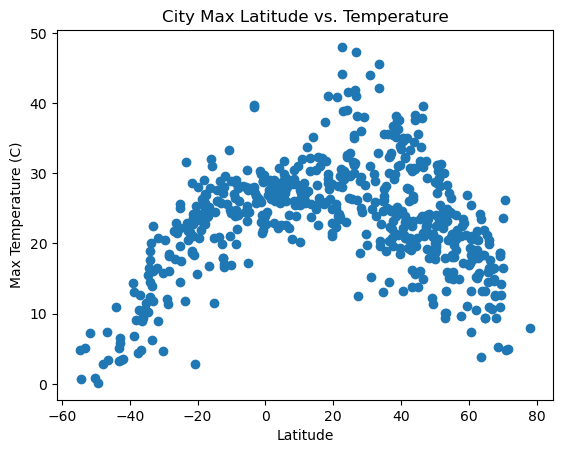

In [8]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df['Lat']
y_axis = city_data_df['Max Temp']

# Incorporate the other graph properties
plt.scatter(x_axis, y_axis)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

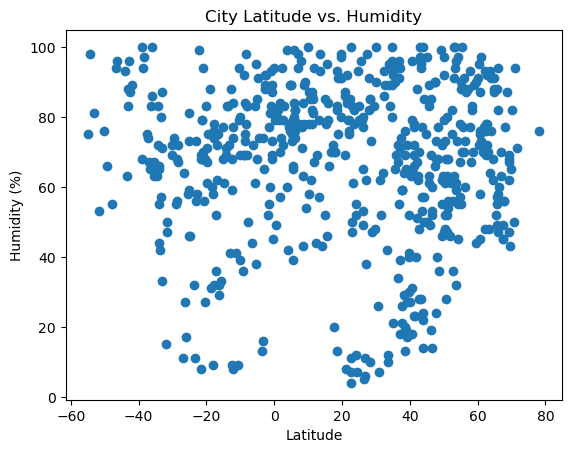

In [9]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df['Lat']
y_axis = city_data_df['Humidity']

# Incorporate the other graph properties
plt.scatter(x_axis, y_axis)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

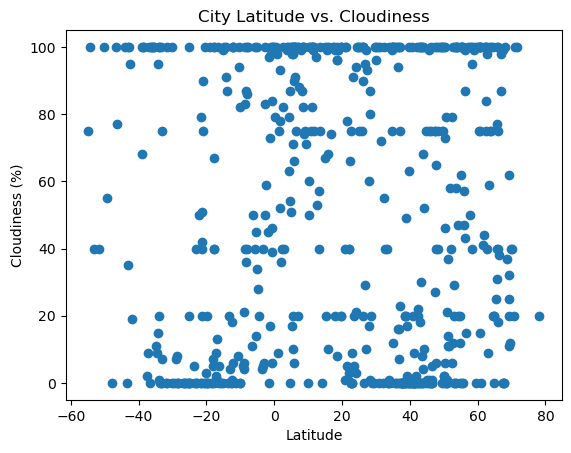

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df['Lat']
y_axis = city_data_df['Cloudiness']

# Incorporate the other graph properties
plt.scatter(x_axis, y_axis)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

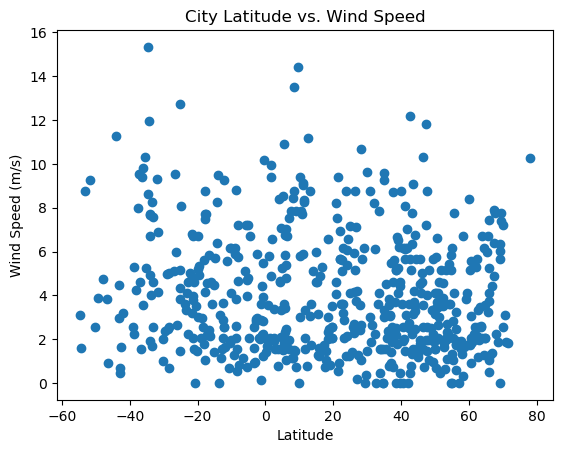

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df['Lat']
y_axis = city_data_df['Wind Speed']

# Incorporate the other graph properties
plt.scatter(x_axis, y_axis)
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
north_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
north_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,thompson,55.7435,-97.8558,18.09,88,0,4.12,CA,1721395337
3,vorgashor,67.5833,63.9500,14.92,49,0,7.91,RU,1721395337
4,kidal,18.4411,1.4078,41.04,13,8,3.01,ML,1721395337
5,ust'-charyshskaya pristan',52.3934,83.6635,22.27,82,6,3.53,RU,1721395337
7,saint-francois,46.4154,3.9054,30.92,53,0,1.54,FR,1721395337


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
south_hemi_df = city_data_df[city_data_df['Lat'] <= 0]

# Display sample data
south_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,0.65,98,100,1.58,GS,1721395336
1,waitangi,-43.9535,-176.5597,11.01,93,100,11.28,NZ,1721395336
6,adamstown,-25.0660,-130.1015,22.14,81,100,12.72,PN,1721395337
10,thurgoona,-36.0451,146.9919,9.33,100,100,3.58,AU,1721395338
13,puerto ayora,-0.7393,-90.3518,21.97,87,84,2.24,EC,1721395339


###  Temperature vs. Latitude Linear Regression Plot

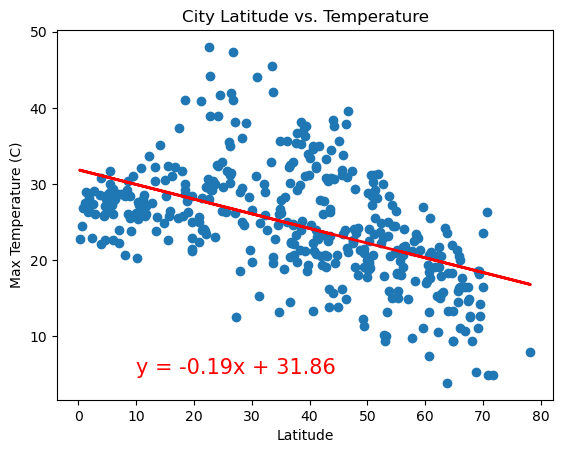

Correlation coefficient (r): -0.52


In [34]:
# Linear regression on Northern Hemisphere
# Build scatter plot for latitude vs. temperature
x_axis = north_hemi_df['Lat']
y_axis = north_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Incorporate the other graph properties
plt.scatter(x_axis, y_axis)
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.annotate(line_eq, (10,5),fontsize=15,color="red")
plt.plot(x_axis, regress_values, color='red', linewidth=2, label='Linear Regression Line')
plt.title("City Latitude vs. Temperature")

# Save the figure
plt.savefig("output_data/Fig5.png")

# Show plot
plt.show()
print(f"Correlation coefficient (r): {rvalue:.2f}")

**Discussion about the linear relationship:** An increase in latitude in the northern hemisphere, trends with a decrease in temperature. To note, the correlation value is weak (-0.52) but the trend is valid.

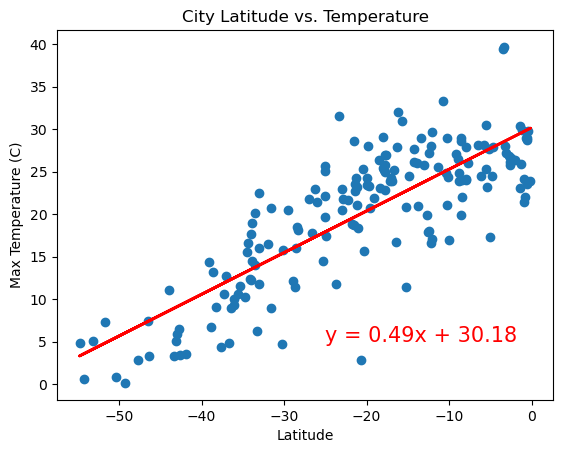

Correlation coefficient (r): 0.82


In [38]:
# Linear regression on Southern Hemisphere
# Build scatter plot for latitude vs. temperature
x_axis = south_hemi_df['Lat']
y_axis = south_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Incorporate the other graph properties
plt.scatter(x_axis, y_axis)
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.annotate(line_eq,(-25,5),fontsize=15,color="red")
plt.plot(x_axis, regress_values, color='red', linewidth=2, label='Linear Regression Line')
plt.title("City Latitude vs. Temperature")

# Save the figure
plt.savefig("output_data/Fig6.png")

# Show plot
plt.show()

print(f"Correlation coefficient (r): {rvalue:.2f}")

**Discussion about the linear relationship:** An increase in latitude in the southern hemisphere directly correlates with and increase in temperature (r=0.82).

### Humidity vs. Latitude Linear Regression Plot

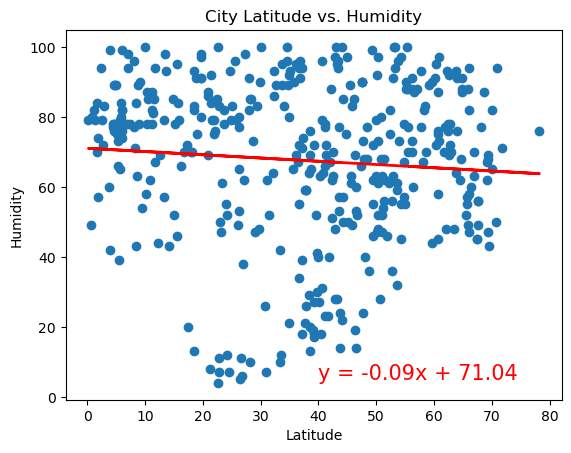

Correlation coefficient (r): -0.08


In [41]:
# Northern Hemisphere
x_axis = north_hemi_df['Lat']
y_axis = north_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


# Incorporate the other graph properties
plt.scatter(x_axis, y_axis)
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.annotate(line_eq,(40,5),fontsize=15,color="red")
plt.plot(x_axis, regress_values, color='red', linewidth=2, label='Linear Regression Line')
plt.title("City Latitude vs. Humidity")

# Save the figure
plt.savefig("output_data/Fig7.png")

# Show plot
plt.show()
print(f"Correlation coefficient (r): {rvalue:.2f}")

**Discussion about the linear relationship:** There is no relationship between humidity and latitude in the northern hemishpere (r=-0.08)

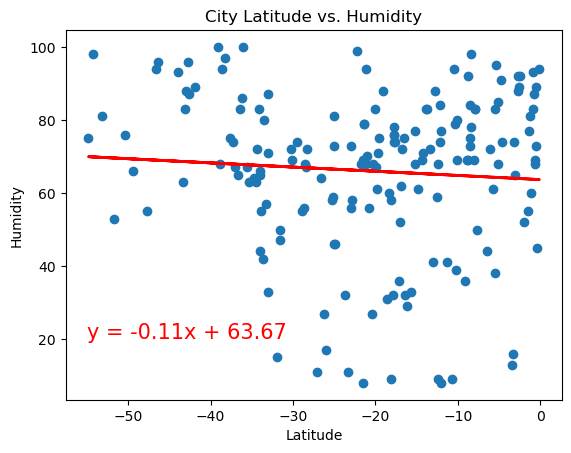

Correlation coefficient (r): -0.07


In [45]:
# Southern Hemisphere
x_axis = south_hemi_df['Lat']
y_axis = south_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


# Incorporate the other graph properties
plt.scatter(x_axis, y_axis)
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.plot(x_axis, regress_values, color='red', linewidth=2, label='Linear Regression Line')
plt.title("City Latitude vs. Humidity")

# Save the figure
plt.savefig("output_data/Fig8.png")

# Show plot
plt.show()
print(f"Correlation coefficient (r): {rvalue:.2f}")

**Discussion about the linear relationship:** There is no relationship between humidity and latitude in the southern hemishpere (r=-0.07)

### Cloudiness vs. Latitude Linear Regression Plot

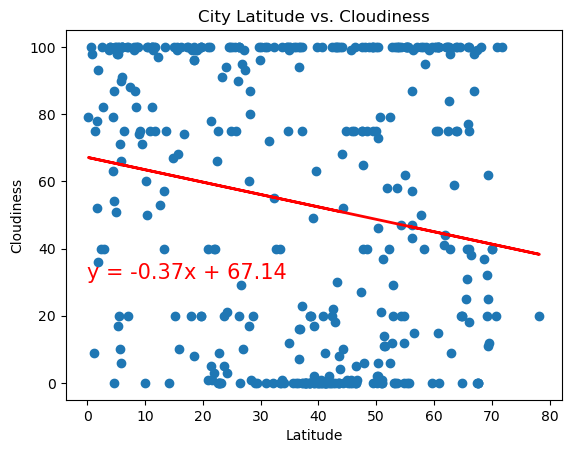

Correlation coefficient (r): -0.18


In [50]:
# Northern Hemisphere
x_axis = north_hemi_df['Lat']
y_axis = north_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


# Incorporate the other graph properties
plt.scatter(x_axis, y_axis)
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.annotate(line_eq,(0,31),fontsize=15,color="red")
plt.plot(x_axis, regress_values, color='red', linewidth=2, label='Linear Regression Line')
plt.title("City Latitude vs. Cloudiness")

# Save the figure
plt.savefig("output_data/Fig9.png")

# Show plot
plt.show()
print(f"Correlation coefficient (r): {rvalue:.2f}")

**Discussion about the linear relationship:** There is no relationship between cloudiness and latitude in the northern hemishpere (r=-0.18)

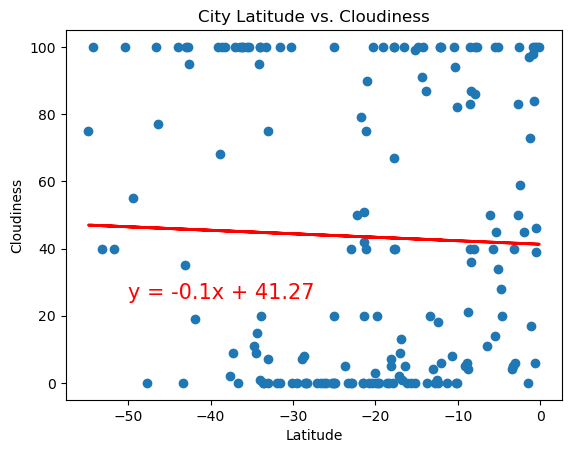

Correlation coefficient (r): -0.03


In [53]:
# Southern Hemisphere
x_axis = south_hemi_df['Lat']
y_axis = south_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Incorporate the other graph properties
plt.scatter(x_axis, y_axis)
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")
plt.plot(x_axis, regress_values, color='red', linewidth=2, label='Linear Regression Line')
plt.title("City Latitude vs. Cloudiness")

# Save the figure
plt.savefig("output_data/Fig10.png")

# Show plot
plt.show()
print(f"Correlation coefficient (r): {rvalue:.2f}")

**Discussion about the linear relationship:** There is no relationship between cloudiness and latitude in the southern hemishpere (r=-0.03)

### Wind Speed vs. Latitude Linear Regression Plot

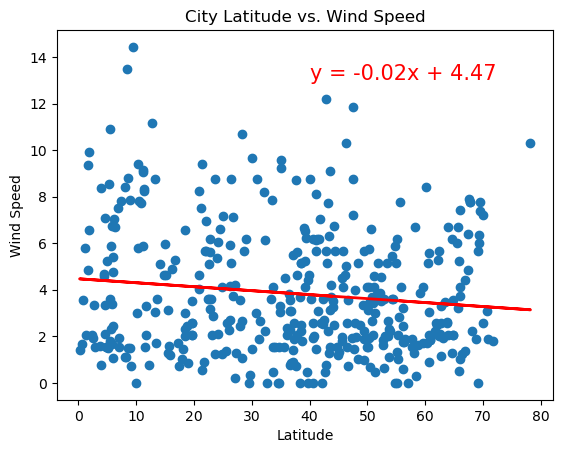

Correlation coefficient (r): -0.13


In [56]:
# Northern Hemisphere
x_axis = north_hemi_df['Lat']
y_axis = north_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Incorporate the other graph properties
plt.scatter(x_axis, y_axis)
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.annotate(line_eq,(40,13),fontsize=15,color="red")
plt.plot(x_axis, regress_values, color='red', linewidth=2, label='Linear Regression Line')
plt.title("City Latitude vs. Wind Speed")

# Save the figure
plt.savefig("output_data/Fig11.png")

# Show plot
plt.show()
print(f"Correlation coefficient (r): {rvalue:.2f}")

**Discussion about the linear relationship:** There is no relationship between wind speed and latitude in the northern hemishpere (r=-0.13)

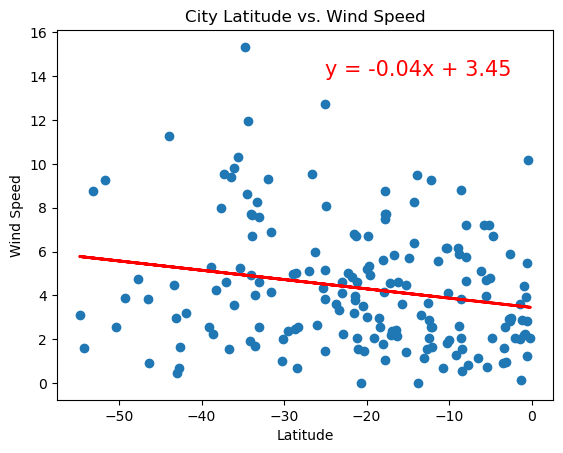

Correlation coefficient (r): -0.21


In [61]:
# Southern Hemisphere
x_axis = south_hemi_df['Lat']
y_axis = south_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Incorporate the other graph properties
plt.scatter(x_axis, y_axis)
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.annotate(line_eq,(-25,14),fontsize=15,color="red")
plt.plot(x_axis, regress_values, color='red', linewidth=2, label='Linear Regression Line')
plt.title("City Latitude vs. Wind Speed")

# Save the figure
plt.savefig("output_data/Fig12.png")

# Show plot
plt.show()
print(f"Correlation coefficient (r): {rvalue:.2f}")

**Discussion about the linear relationship:** There is no direct relationship between wind speed and latitude in the souther hemishpere, however there may be a very weak trend showing decreasing wind speed with increasing latitude (r=-0.21).